# Pytorch WorkFlow

In [101]:
what_we_learn = {1: "Data (preparation)",
                  2: "build model",
                  3: "fitting the model to data (training)",
                  4: "making prediction and evaluating a model (inference)",
                  5: "Improve through Experiments",
                  6:"saving and laoding a model",
                  7:"putting it all together"}

In [102]:
what_we_learn

{1: 'Data (preparation)',
 2: 'build model',
 3: 'fitting the model to data (training)',
 4: 'making prediction and evaluating a model (inference)',
 5: 'Improve through Experiments',
 6: 'saving and laoding a model',
 7: 'putting it all together'}

In [103]:
import torch
from torch import nn # nn contains all the basic building blocks for neural networks
import matplotlib.pyplot as plt
torch.__version__


'2.1.0+cu121'

## Data Preparation

Data can be almost anything... in machine learning

* Excel sheet
* Images of any kind
* Videos (youtube has lot of data)
* Audio (song popcast)
* DNA
* Text

Machine learning is game of two parts:

1. Get data into a numerical representation.
2. Build a model to learn pattern in that numerical representation.

In [104]:
# let create some known data using known data
#  we willl use linear regression formula to make a straight line with know parameters


In [105]:
weigth = 0.7
bias = 0.3

# Create
start =0
end =1
step =0.02
X = torch.arange(start,end,step)
X,X.shape

(tensor([0.0000, 0.0200, 0.0400, 0.0600, 0.0800, 0.1000, 0.1200, 0.1400, 0.1600,
         0.1800, 0.2000, 0.2200, 0.2400, 0.2600, 0.2800, 0.3000, 0.3200, 0.3400,
         0.3600, 0.3800, 0.4000, 0.4200, 0.4400, 0.4600, 0.4800, 0.5000, 0.5200,
         0.5400, 0.5600, 0.5800, 0.6000, 0.6200, 0.6400, 0.6600, 0.6800, 0.7000,
         0.7200, 0.7400, 0.7600, 0.7800, 0.8000, 0.8200, 0.8400, 0.8600, 0.8800,
         0.9000, 0.9200, 0.9400, 0.9600, 0.9800]),
 torch.Size([50]))

In [106]:
X = X.unsqueeze(dim=1)
X.shape

torch.Size([50, 1])

In [107]:
y = X*weigth + bias

In [108]:
X[0:10],y[0:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [109]:
# Spliting data into training and testing set
# Create train/test split

train_split = int(0.8*len(X))
X_train ,y_train = X[:train_split], y[:train_split]
X_test , y_test = X[train_split:],y[train_split:]








In [110]:
### visualize data
def visualize_data(train_data =X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = None):
  plt.figure(figsize=(10,7))
  #plot training data
  plt.scatter(train_data, train_labels, c='b',label="Training Data")
  # plot testing data
  plt.scatter(test_data,test_labels,c='g',label="Testing data")

  # are there prediction are there predictions
  if predictions is not None:
    # plot the prediction if they exist
    plt.scatter(test_data,predictions,c='r',label="Predictions")

# show the legend
  plt.legend()



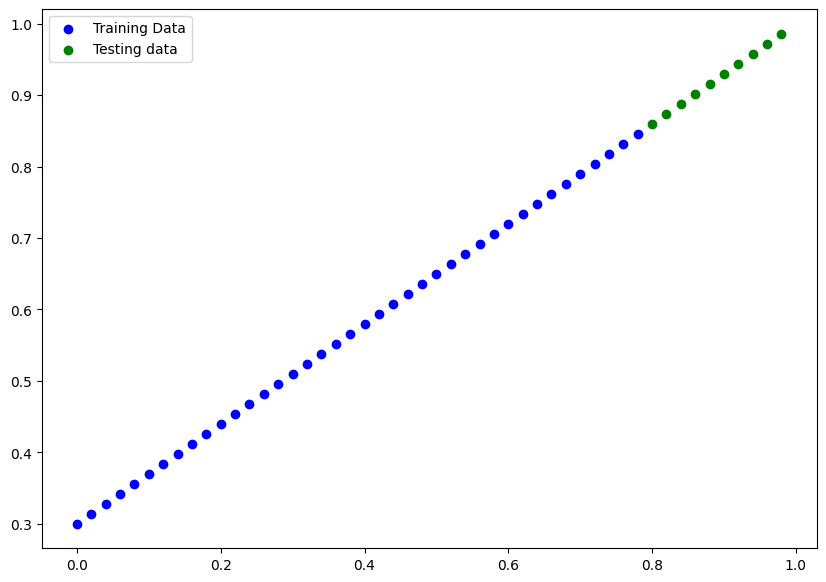

In [111]:
visualize_data()

In [112]:
## Build pytorch Model
# Create linear regression python class
class LinearRegressionModel(nn.Module): # alomost everything in pytorch inherits from nn.Module (base class for all neural network class)
  def __init__(self):
    # inheriting all the functionality of super class here --> nn.module
    super().__init__()

    # parameters
    self.weights = nn.Parameter(torch.rand(1,
                                          dtype=torch.float,
                                          requires_grad =True
                                           ))

    self.bias = nn.Parameter(torch.rand(1,
                                        dtype=torch.float,
                                        requires_grad = True))
    # forward every model of pytorch which inherited nn.module needs to override this model
  def forward(self, x):
    return self.weights * x + self.bias



In [113]:
# Set manual seed since nn.Parameter are randomly initialzied
torch.manual_seed(3)
Regression_Model = LinearRegressionModel()



In [114]:
print(list(Regression_Model.parameters())) # important
print(Regression_Model.state_dict())# important

[Parameter containing:
tensor([0.0043], requires_grad=True), Parameter containing:
tensor([0.1056], requires_grad=True)]
OrderedDict([('weights', tensor([0.0043])), ('bias', tensor([0.1056]))])


In [115]:
with torch.inference_mode():
  prediction_random = Regression_Model.forward(X_test)

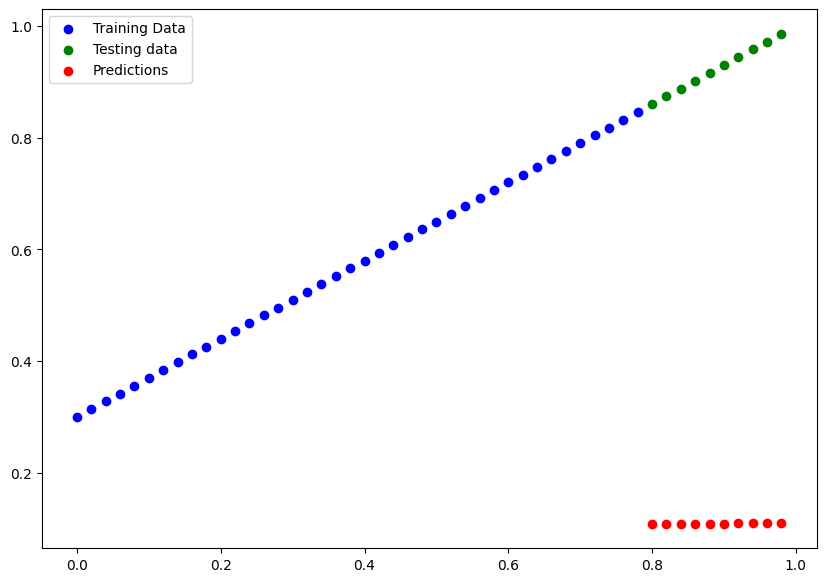

In [116]:
visualize_data(predictions =prediction_random )

In [117]:
# above graph is random prediction without training
# loss function for the model
loss_fn = nn.L1Loss()


# optimizer algorithm
optimizer = torch.optim.SGD(params=Regression_Model.parameters(),lr =0.01)


epoch : 0 , Training Loss : 0.46576792001724243, Testing Loss : 0.800165057182312
epoch : 20 , Training Loss : 0.23562633991241455, Testing Loss : 0.5312451124191284
epoch : 40 , Training Loss : 0.12321446090936661, Testing Loss : 0.3449854254722595
epoch : 60 , Training Loss : 0.09883765131235123, Testing Loss : 0.2584149241447449
epoch : 80 , Training Loss : 0.08989842236042023, Testing Loss : 0.2188093215227127
epoch : 100 , Training Loss : 0.0829184278845787, Testing Loss : 0.19676916301250458
epoch : 120 , Training Loss : 0.07597683370113373, Testing Loss : 0.17678964138031006
epoch : 140 , Training Loss : 0.06910945475101471, Testing Loss : 0.16093146800994873
epoch : 160 , Training Loss : 0.062235958874225616, Testing Loss : 0.14507324993610382
epoch : 180 , Training Loss : 0.055369578301906586, Testing Loss : 0.1285281628370285
epoch : 200 , Training Loss : 0.048504773527383804, Testing Loss : 0.11266996711492538
epoch : 220 , Training Loss : 0.04163209721446037, Testing Loss :

<ipython-input-110-17db0748f2c1>:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(10,7))


epoch : 440 , Training Loss : 0.004438068717718124, Testing Loss : 0.005815363023430109
epoch : 460 , Training Loss : 0.004438068717718124, Testing Loss : 0.005815363023430109
epoch : 480 , Training Loss : 0.004438068717718124, Testing Loss : 0.005815363023430109
epoch : 500 , Training Loss : 0.004438068717718124, Testing Loss : 0.005815363023430109
epoch : 520 , Training Loss : 0.004438068717718124, Testing Loss : 0.005815363023430109
epoch : 540 , Training Loss : 0.004438068717718124, Testing Loss : 0.005815363023430109
epoch : 560 , Training Loss : 0.004438068717718124, Testing Loss : 0.005815363023430109
epoch : 580 , Training Loss : 0.004438068717718124, Testing Loss : 0.005815363023430109
epoch : 600 , Training Loss : 0.004438068717718124, Testing Loss : 0.005815363023430109
epoch : 620 , Training Loss : 0.004438068717718124, Testing Loss : 0.005815363023430109
epoch : 640 , Training Loss : 0.004438068717718124, Testing Loss : 0.005815363023430109
epoch : 660 , Training Loss : 0.

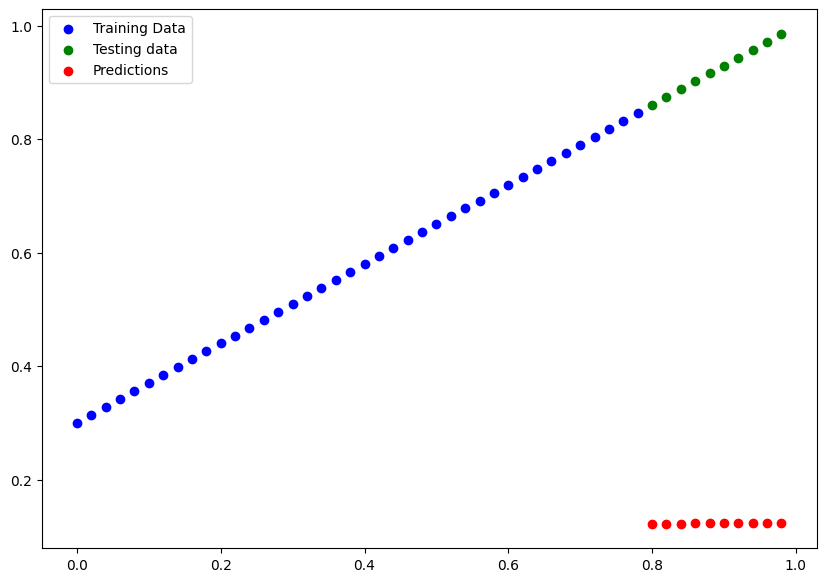

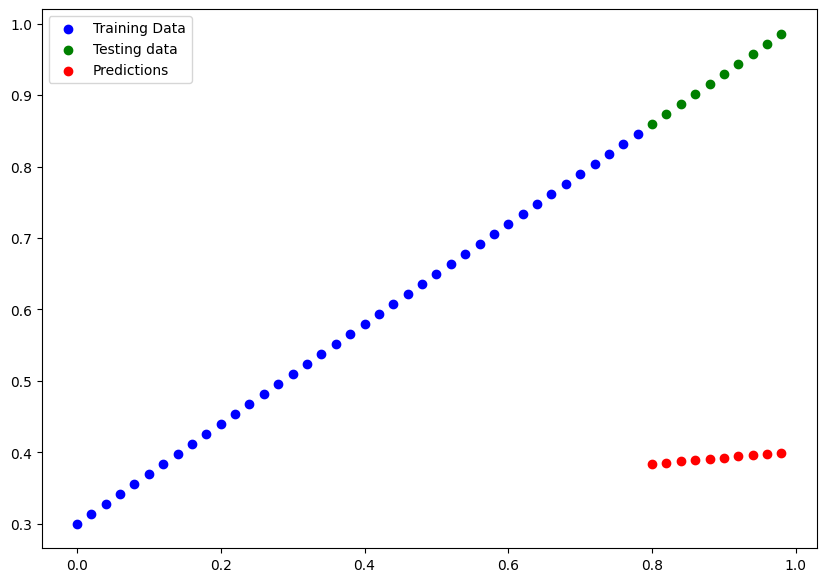

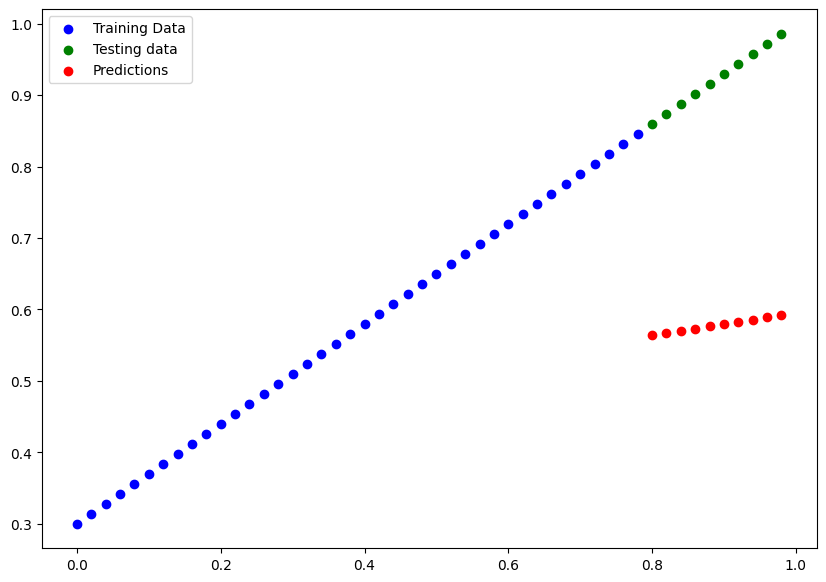

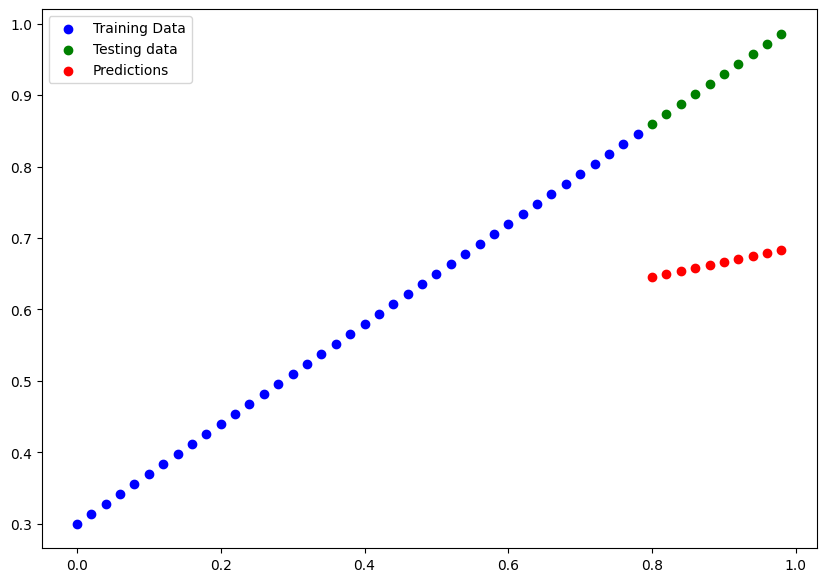

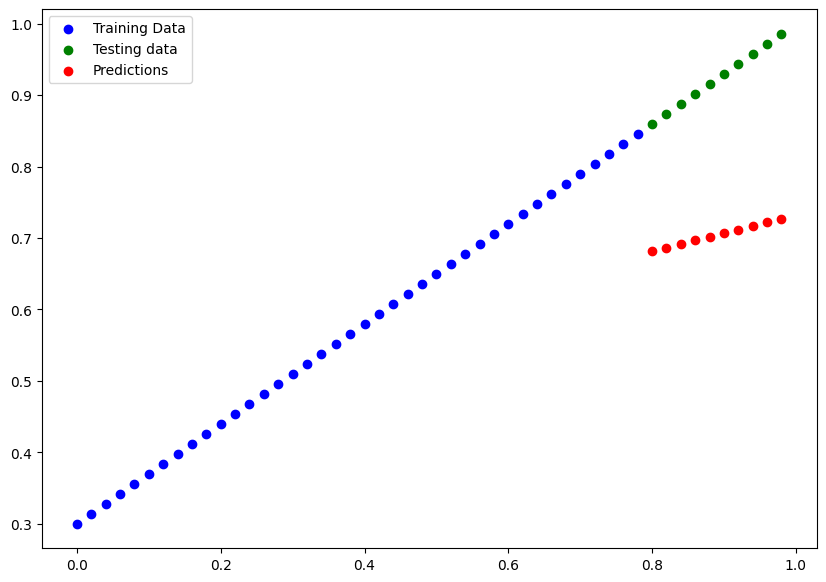

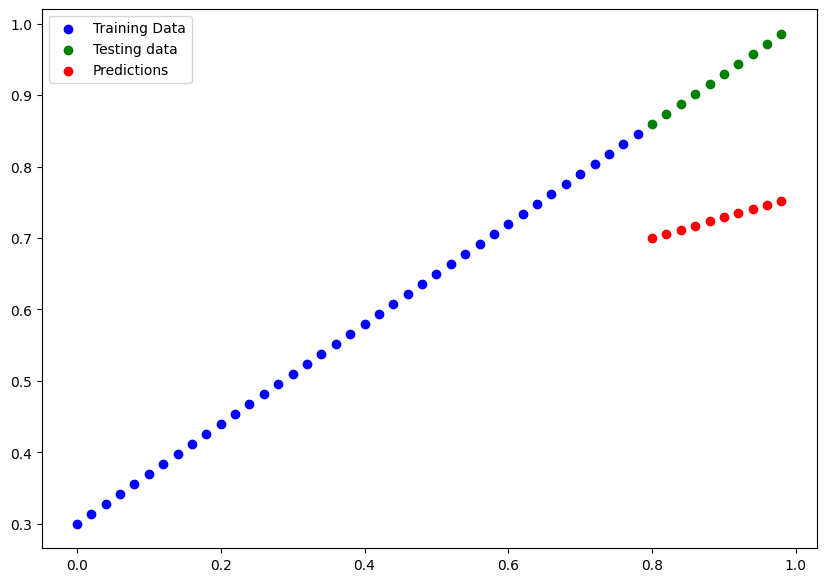

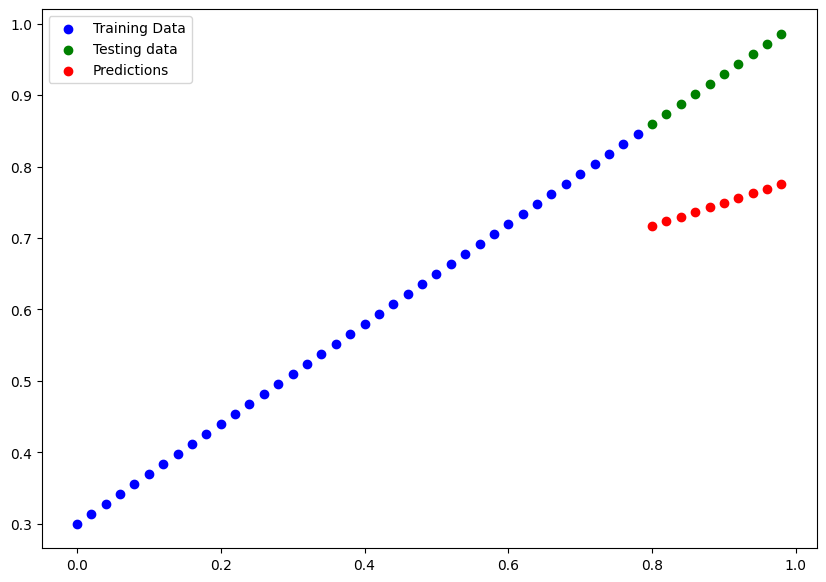

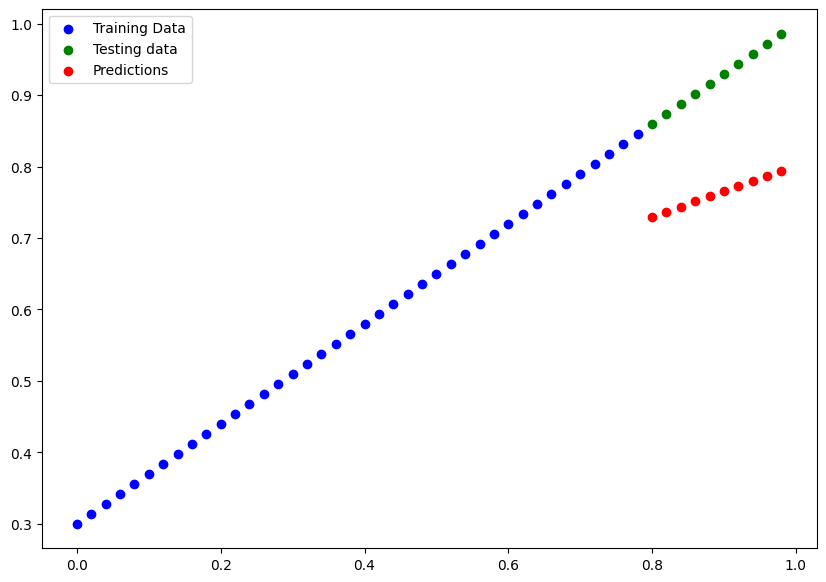

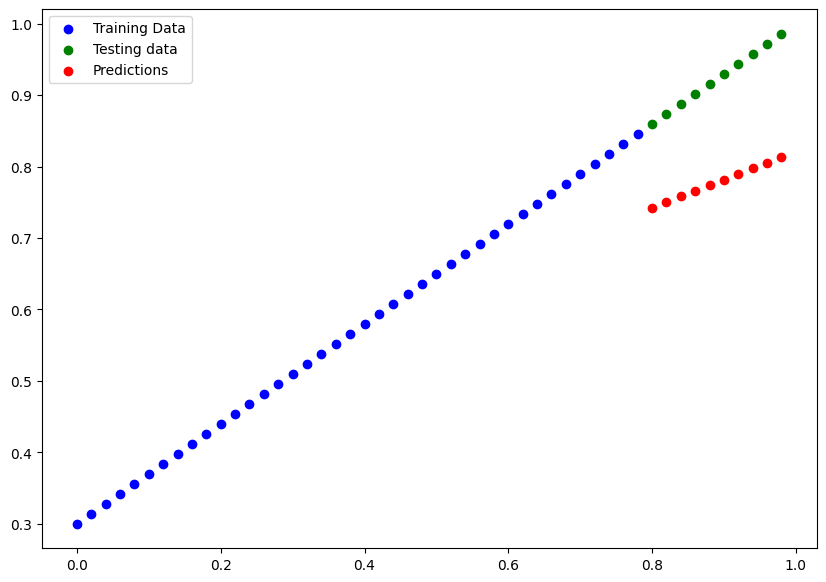

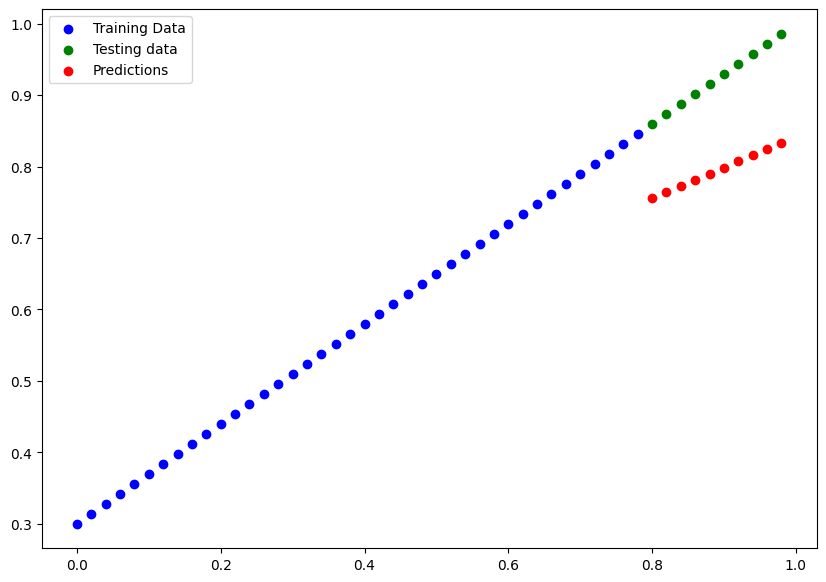

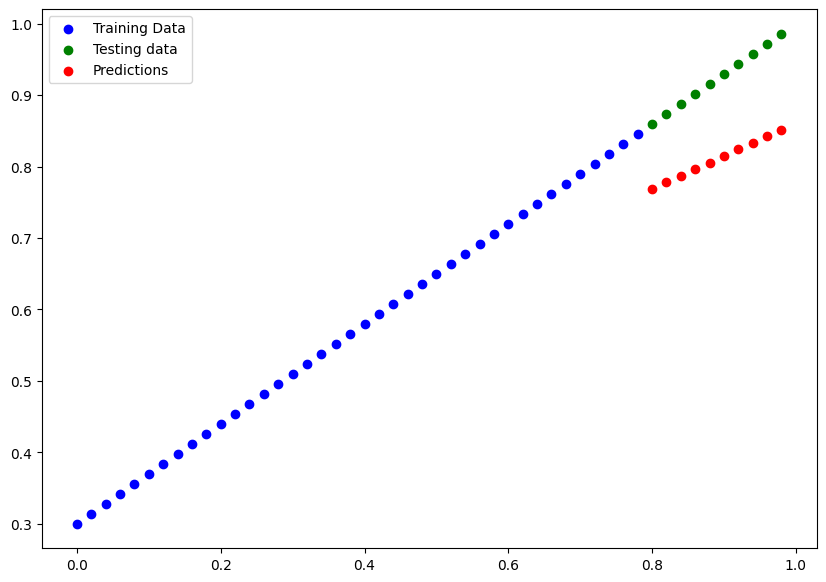

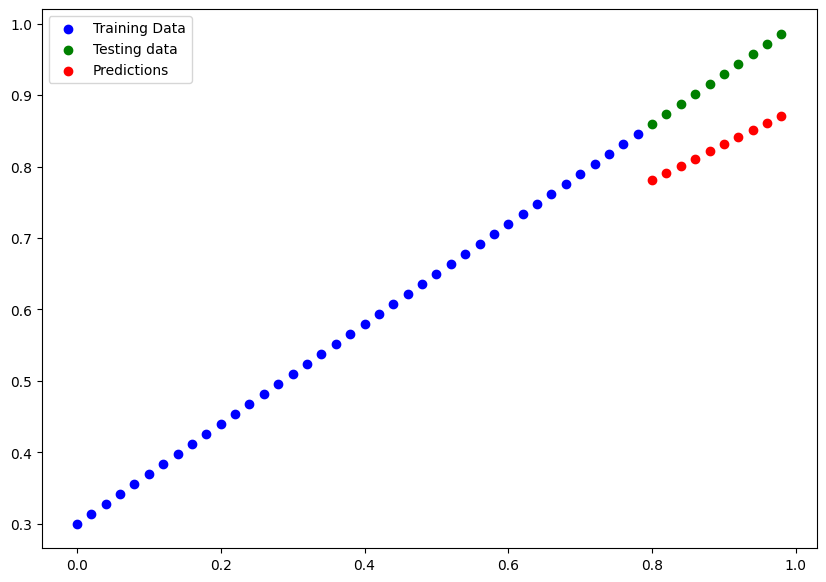

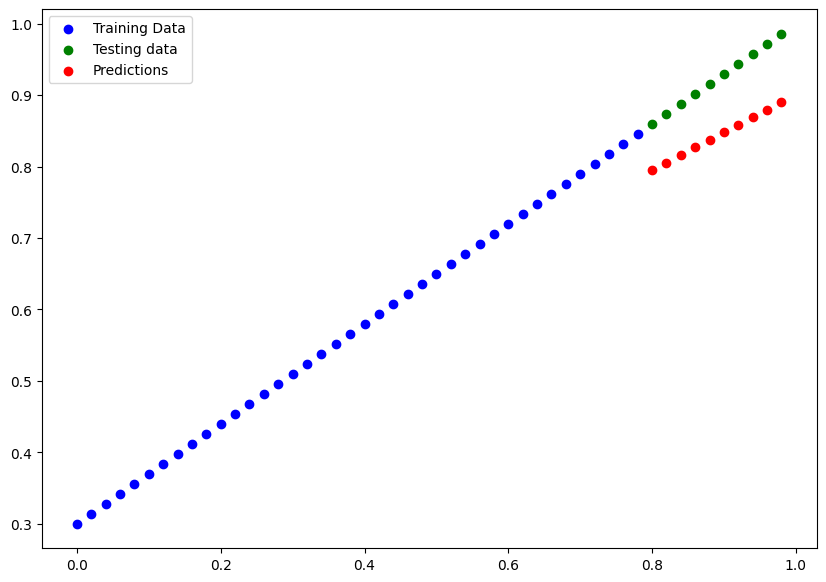

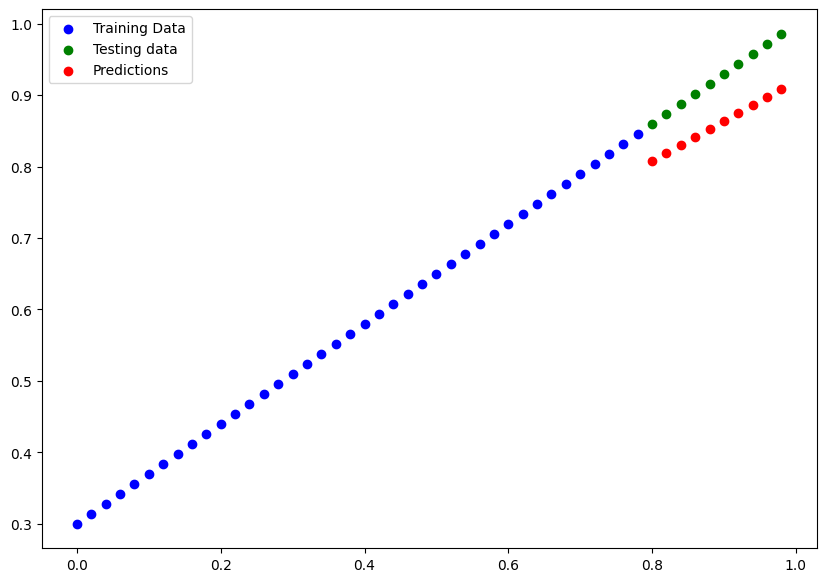

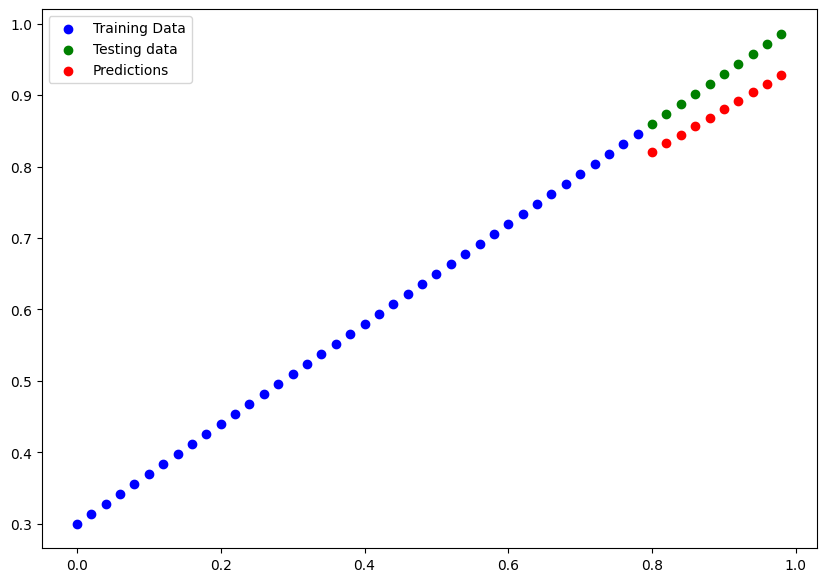

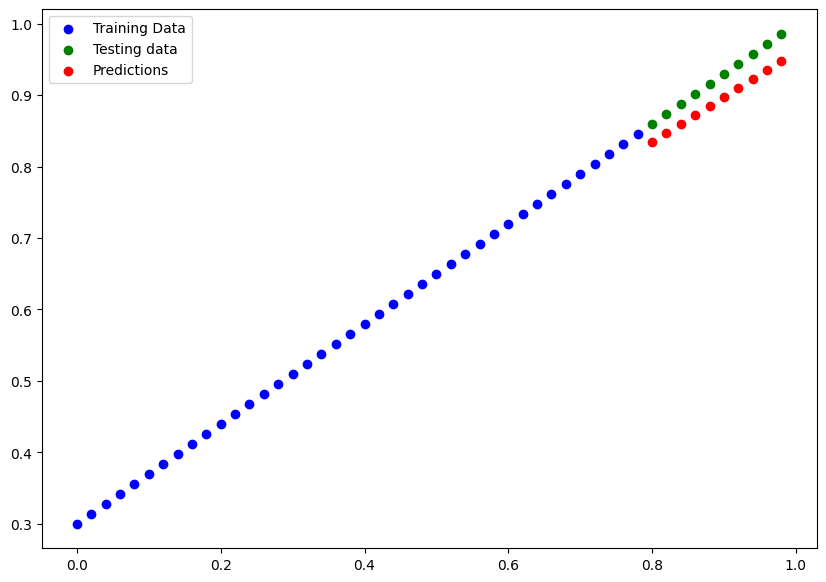

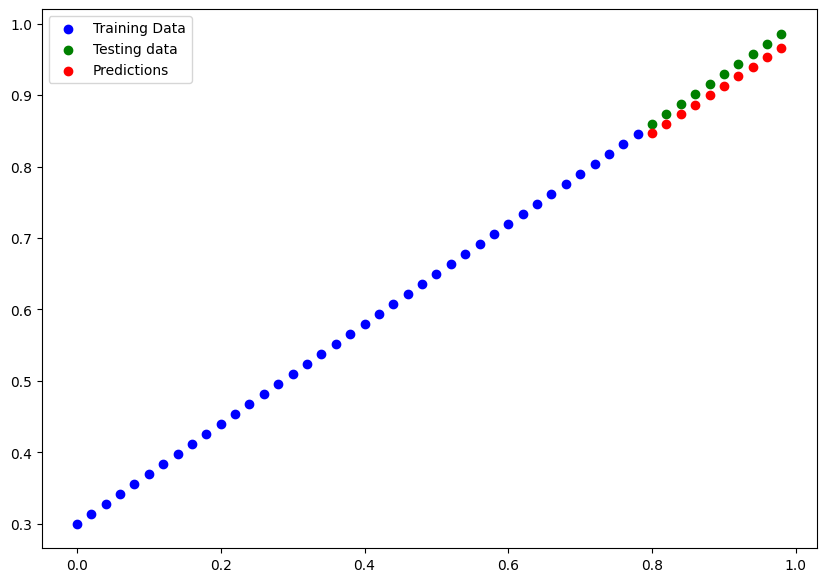

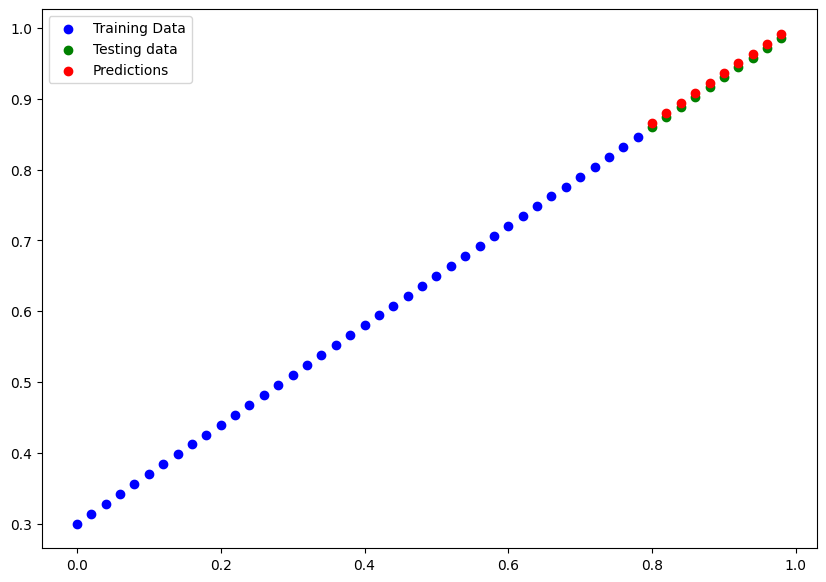

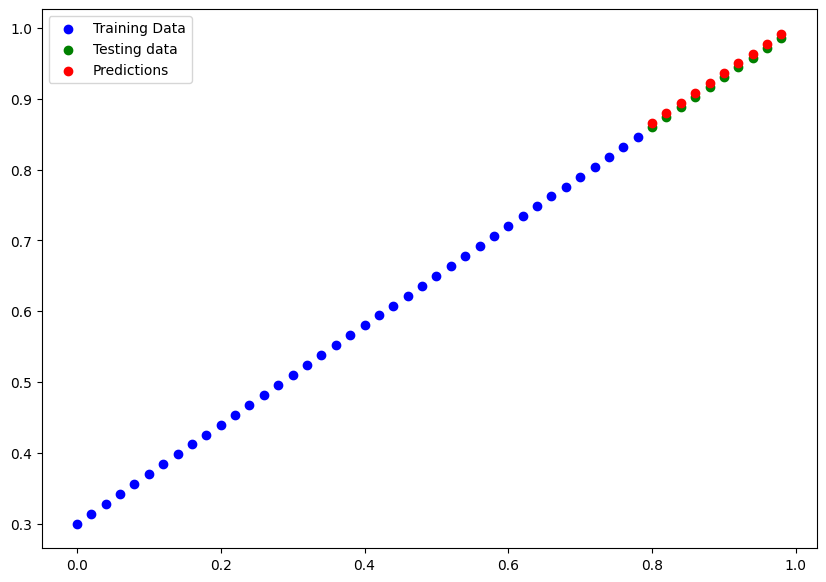

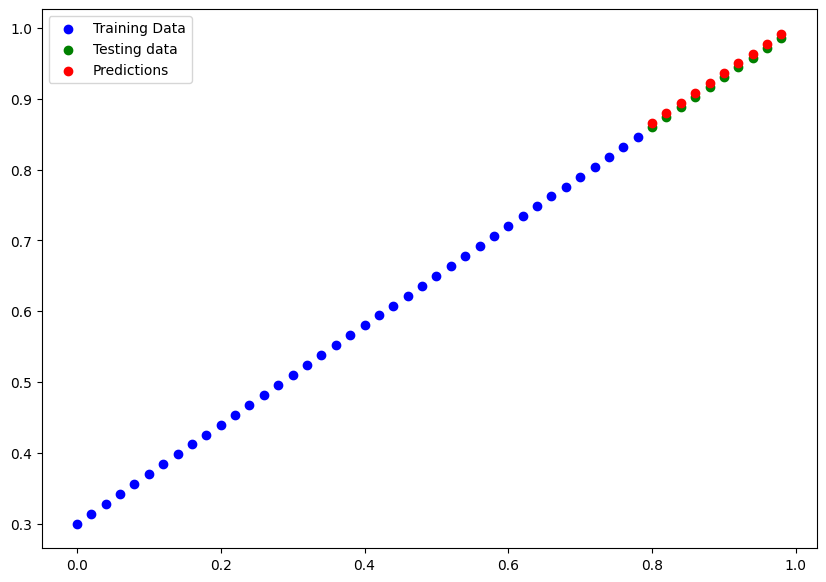

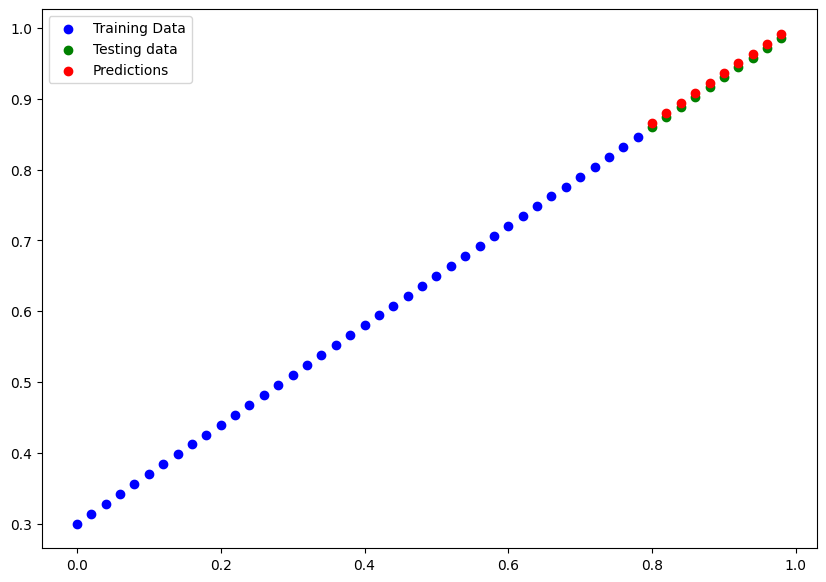

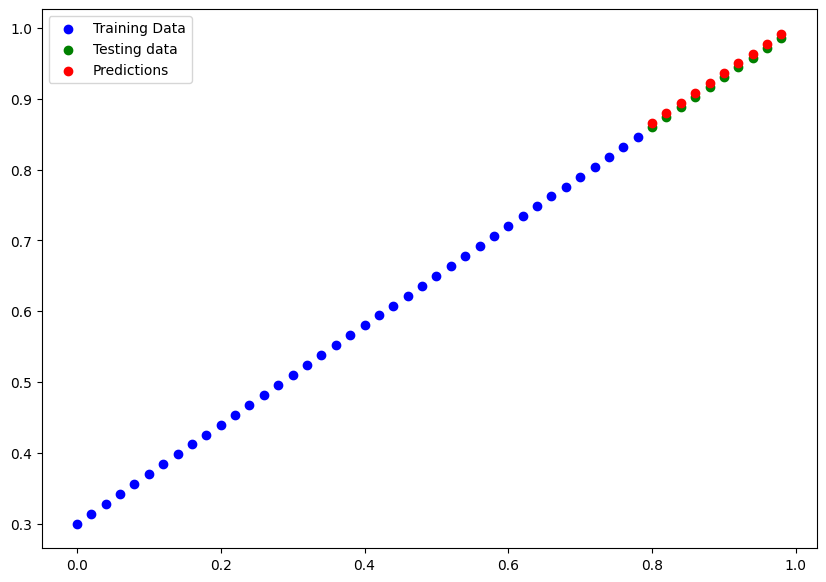

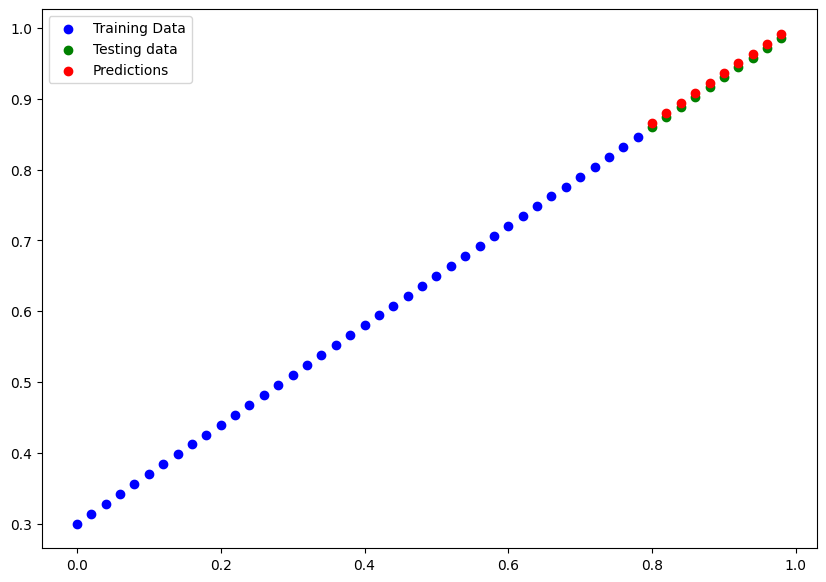

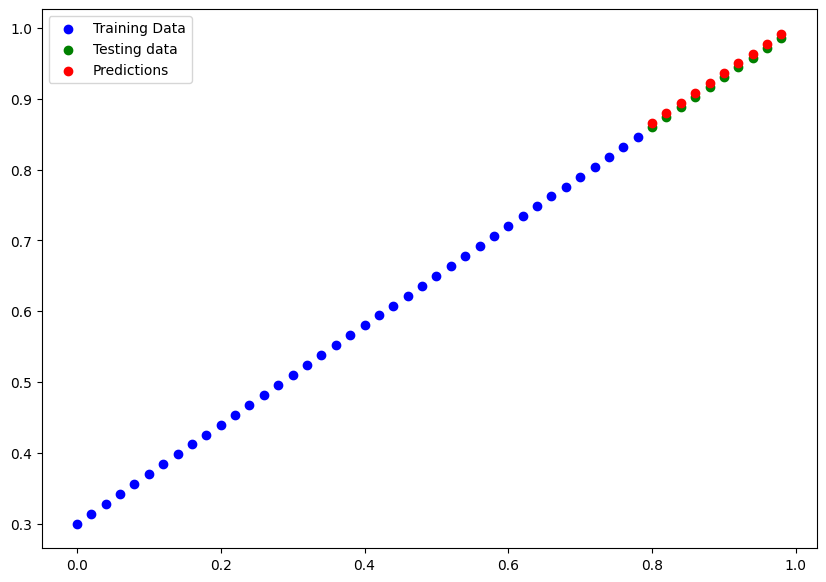

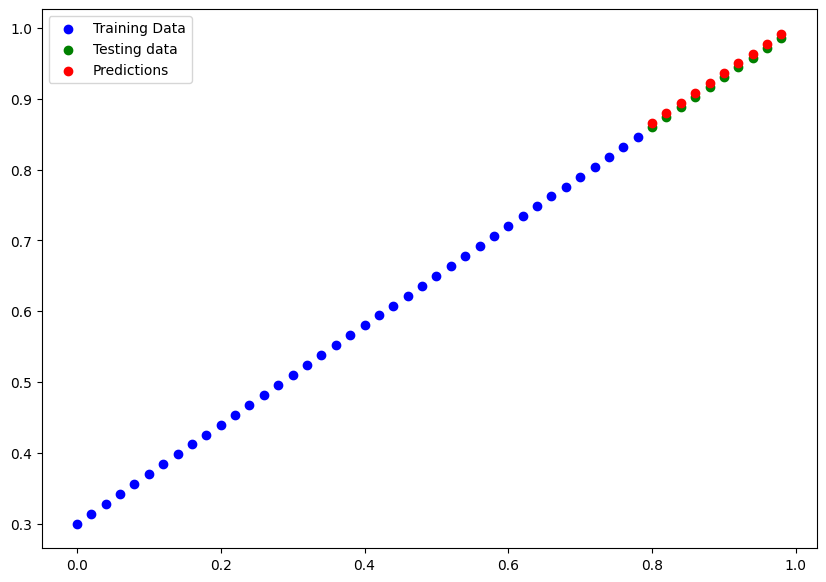

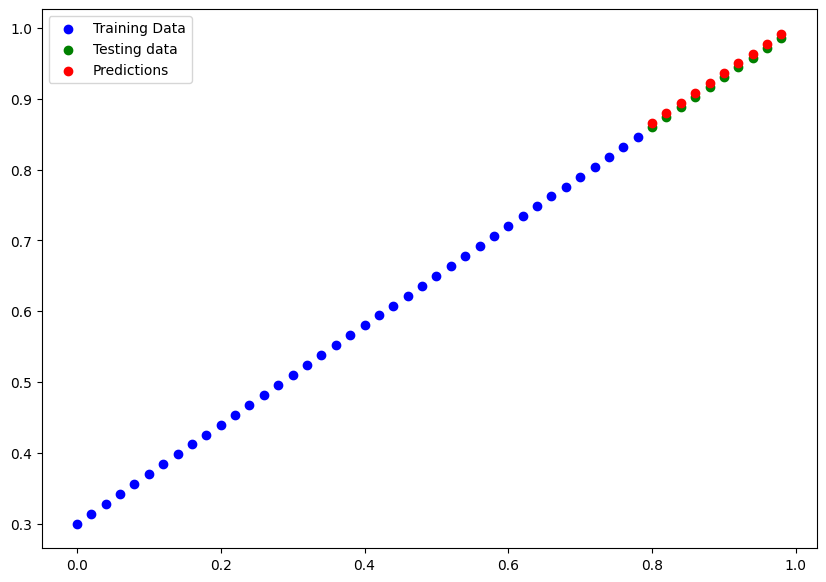

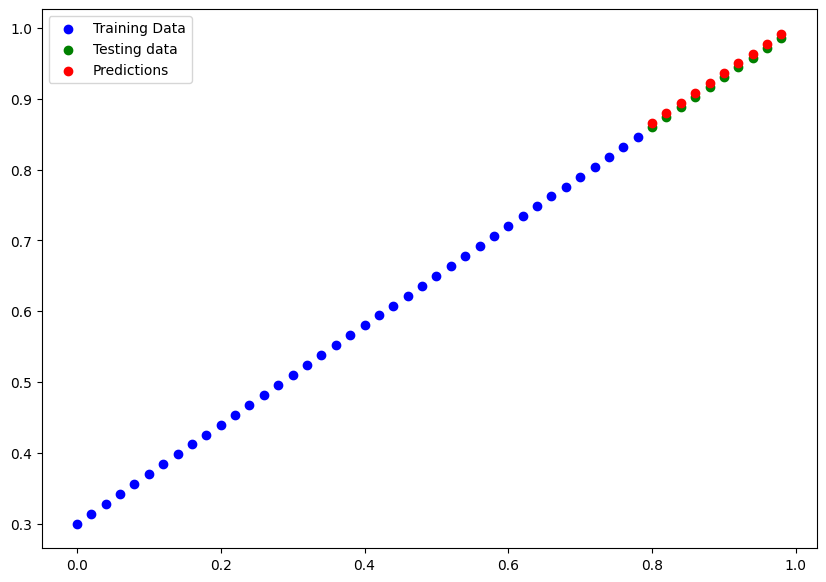

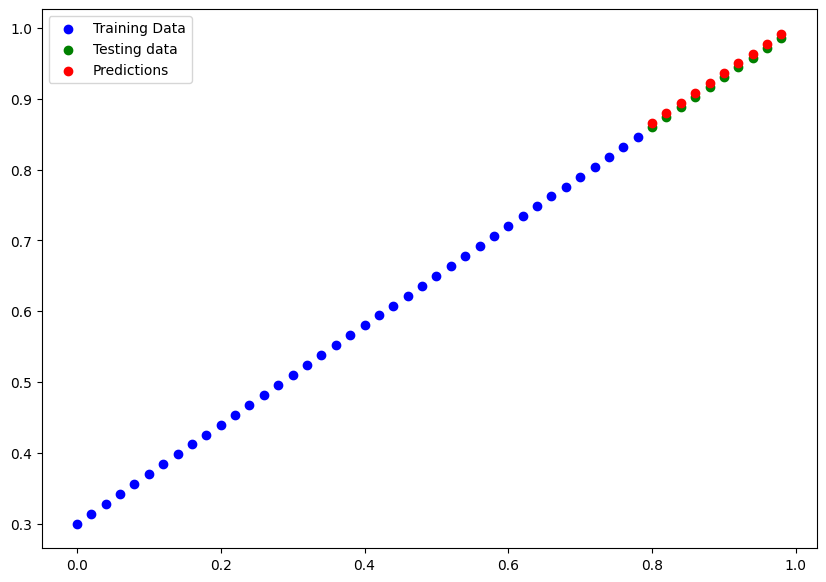

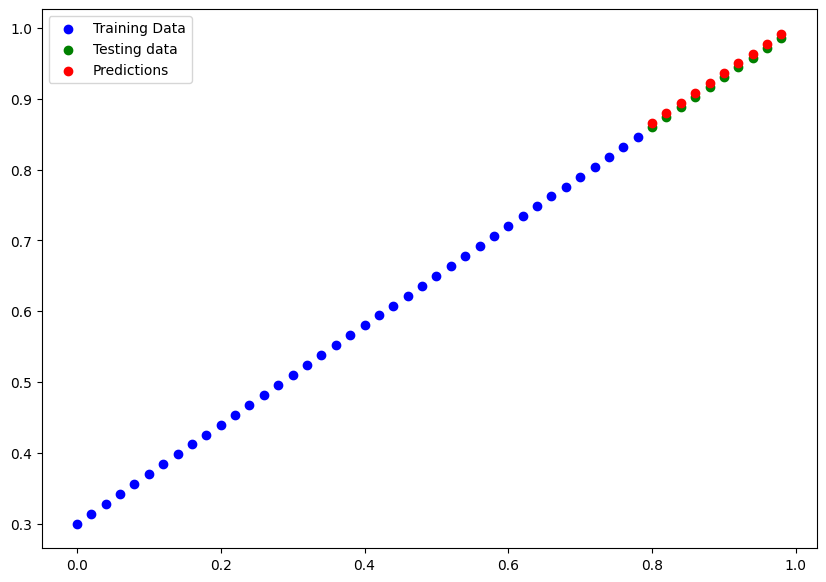

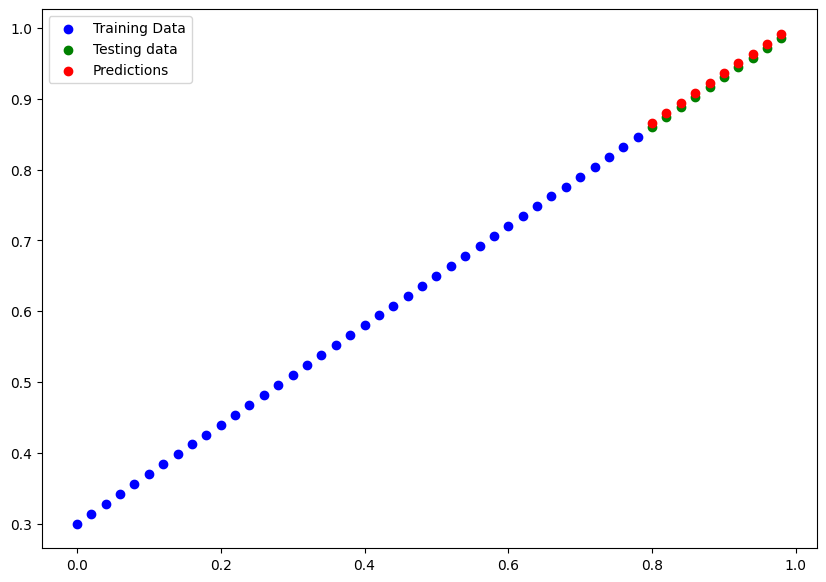

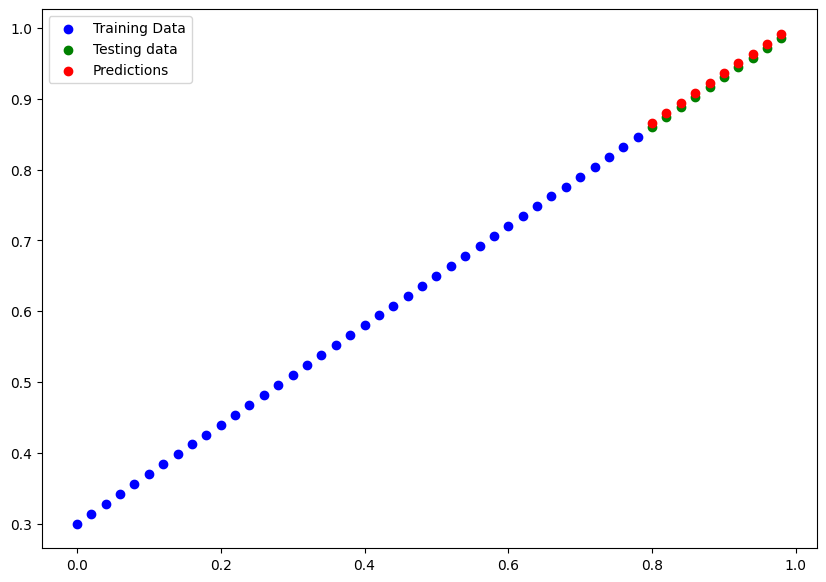

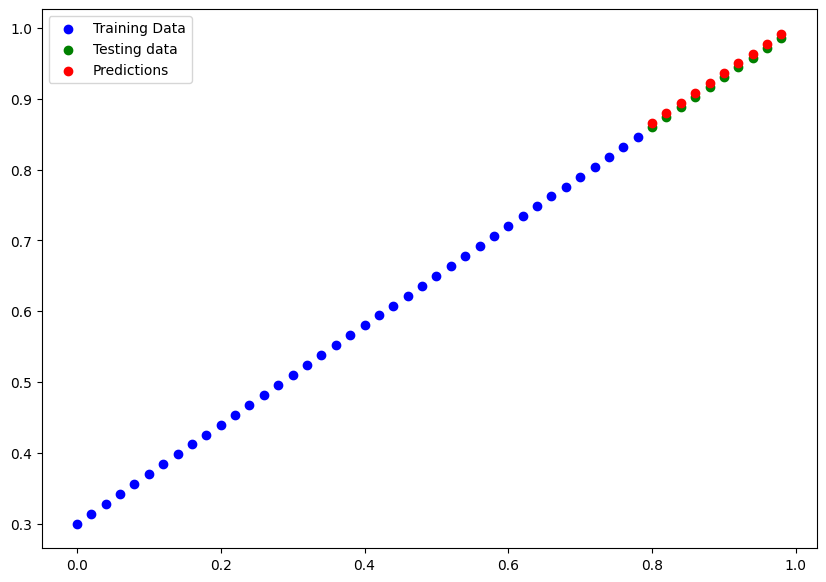

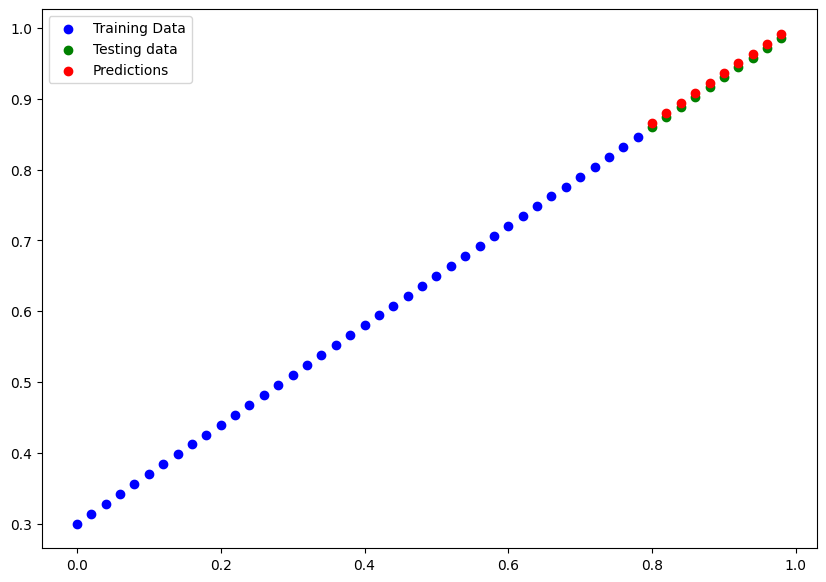

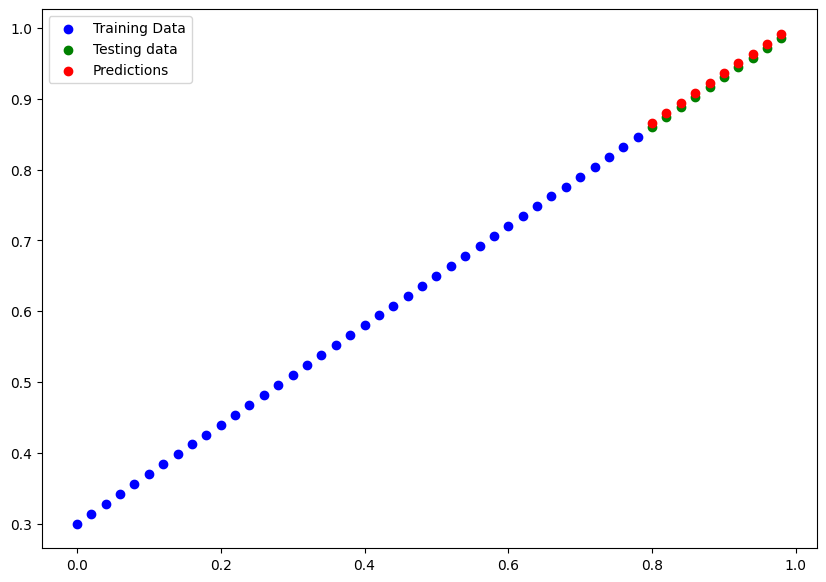

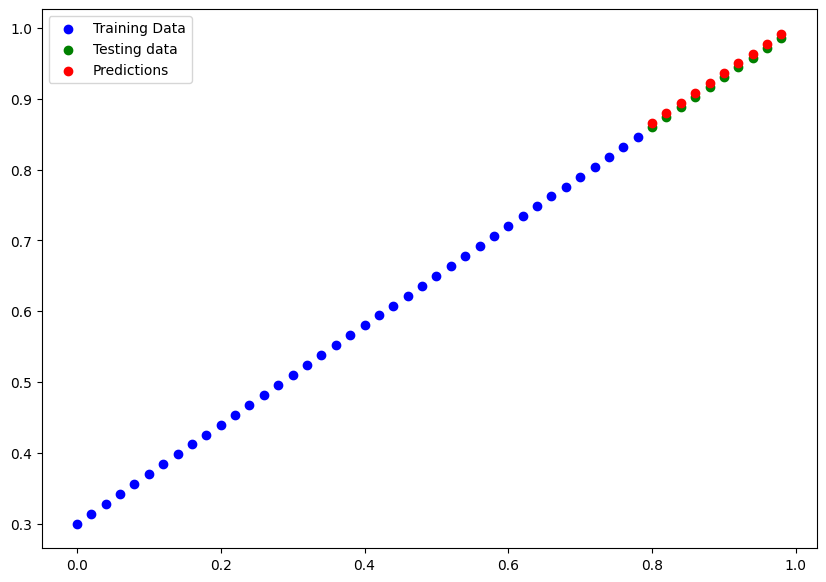

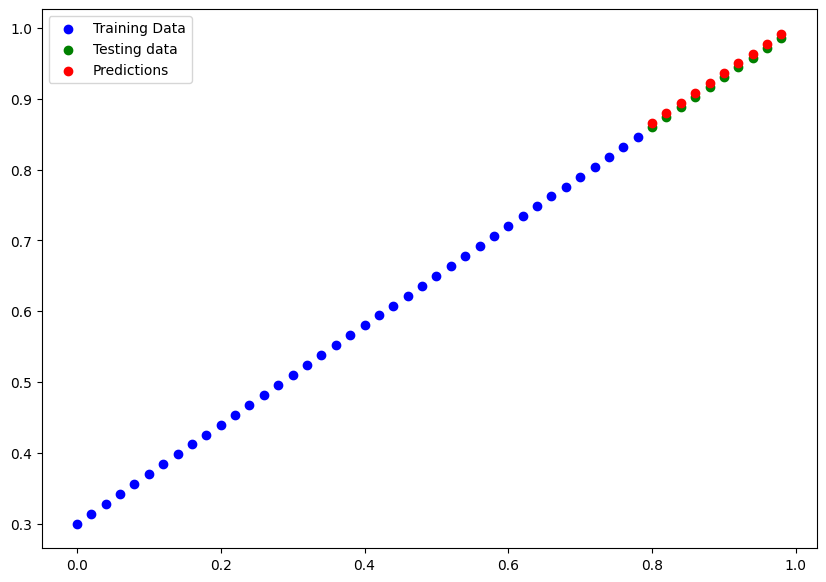

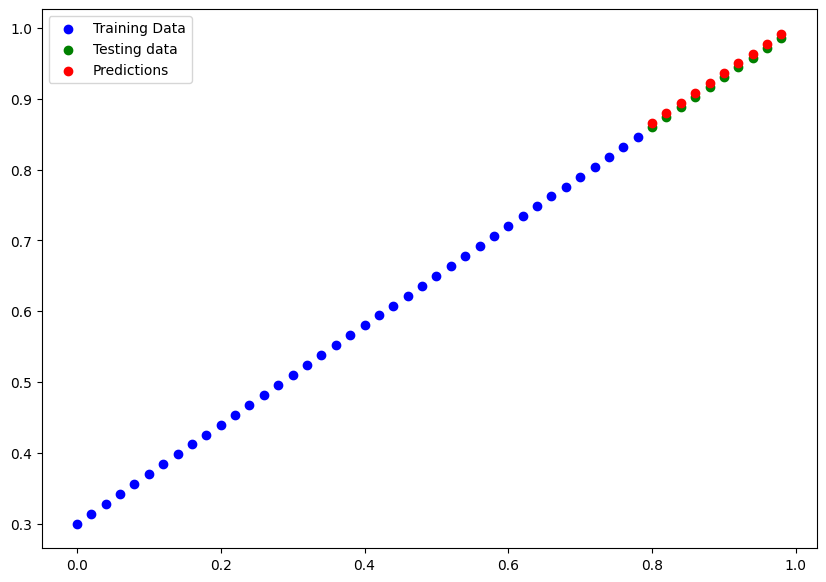

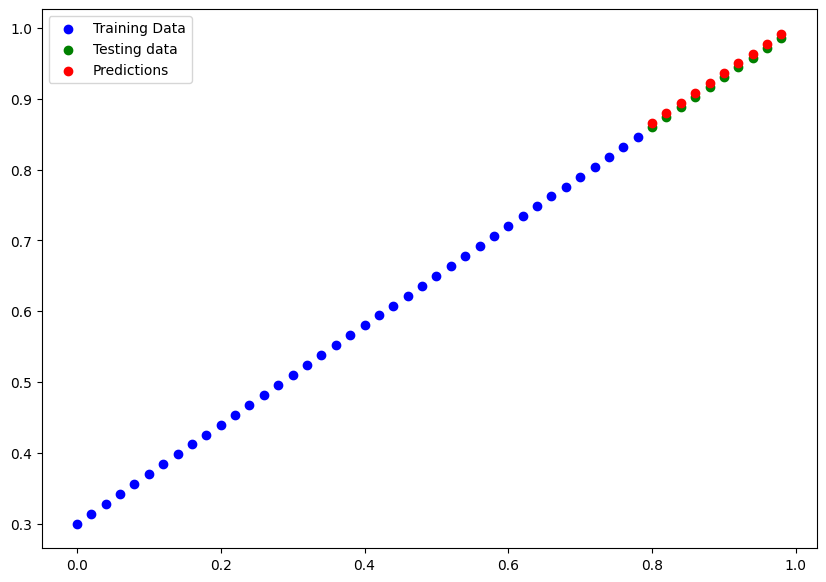

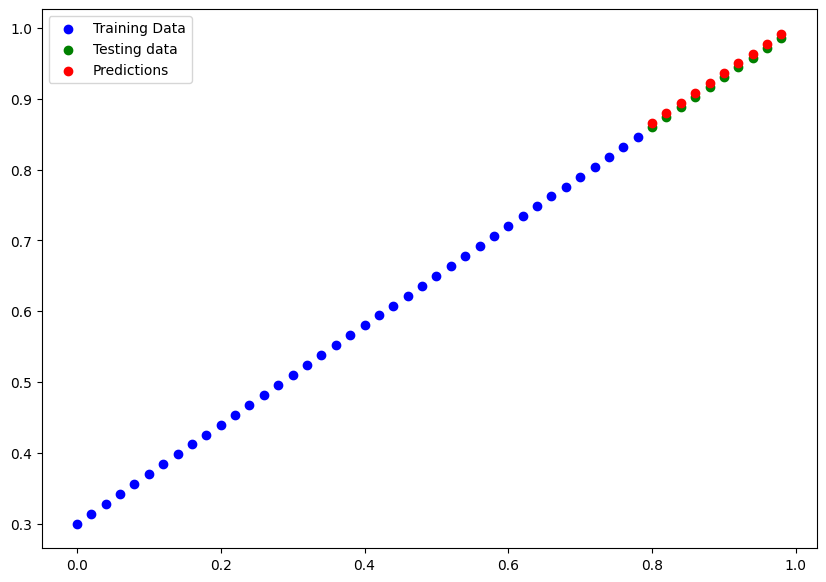

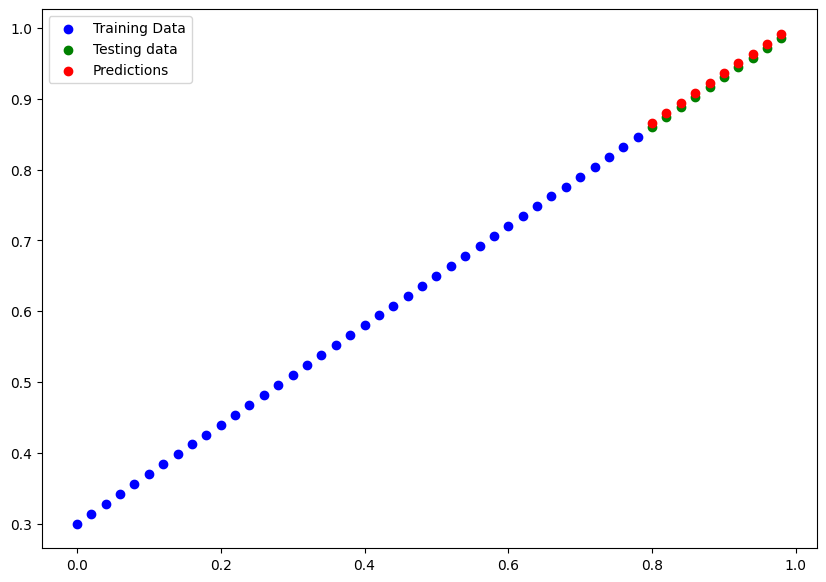

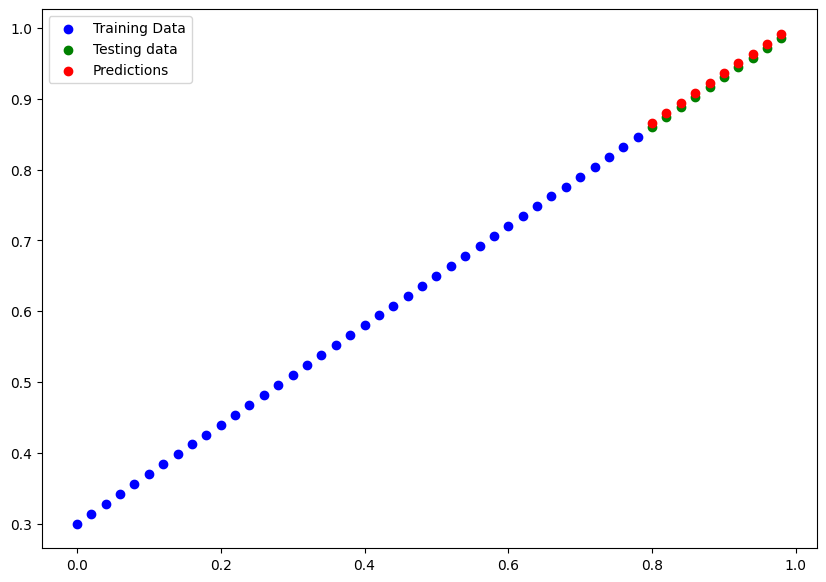

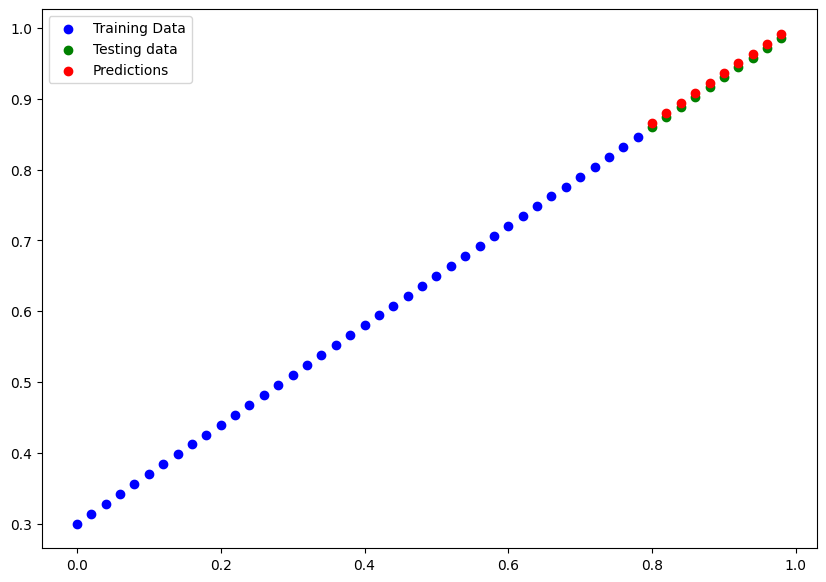

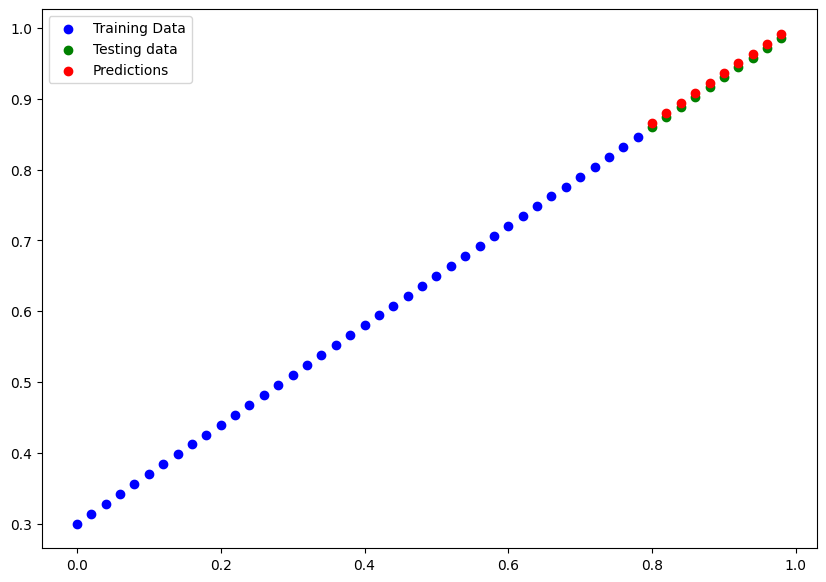

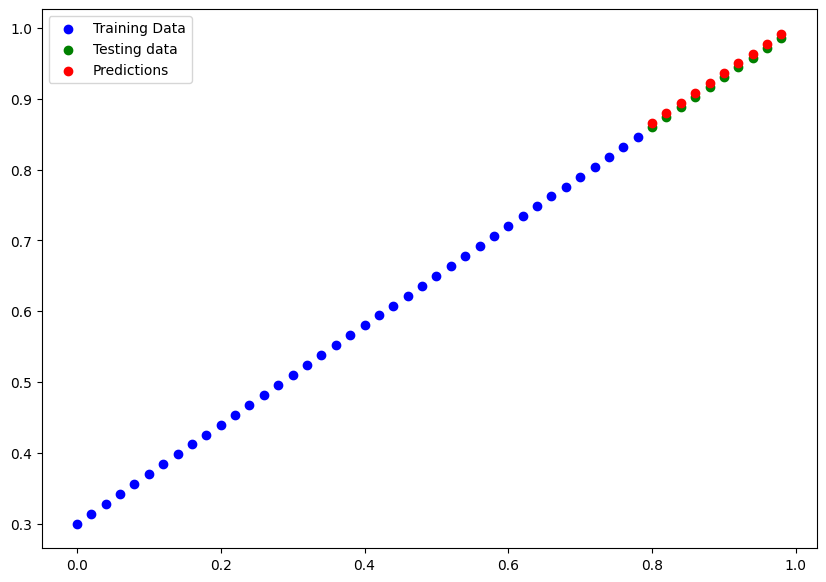

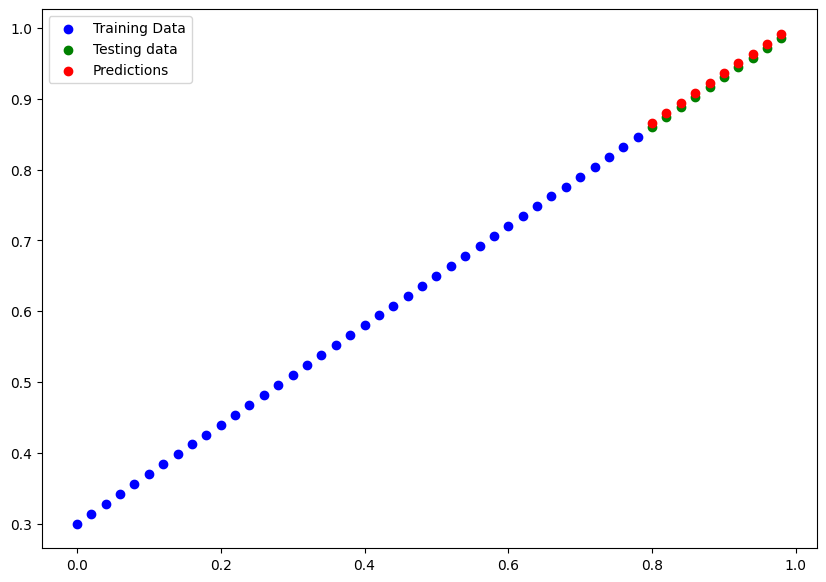

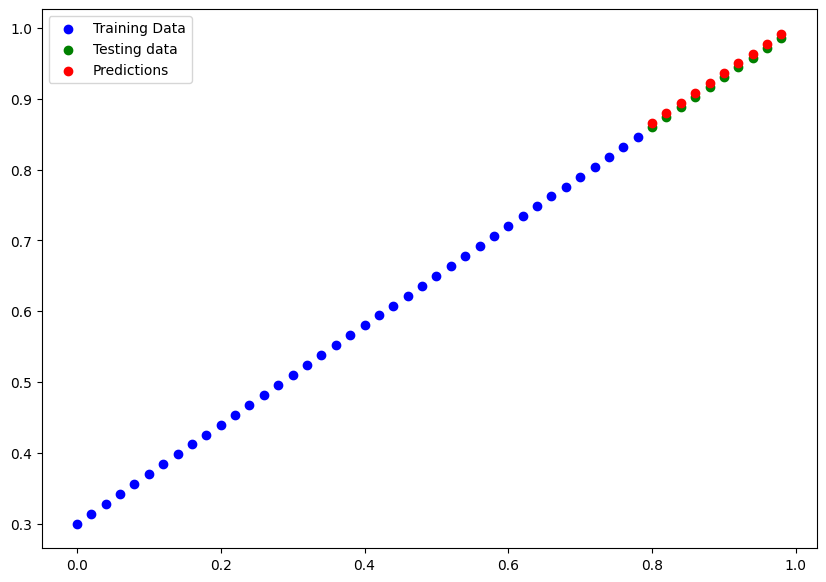

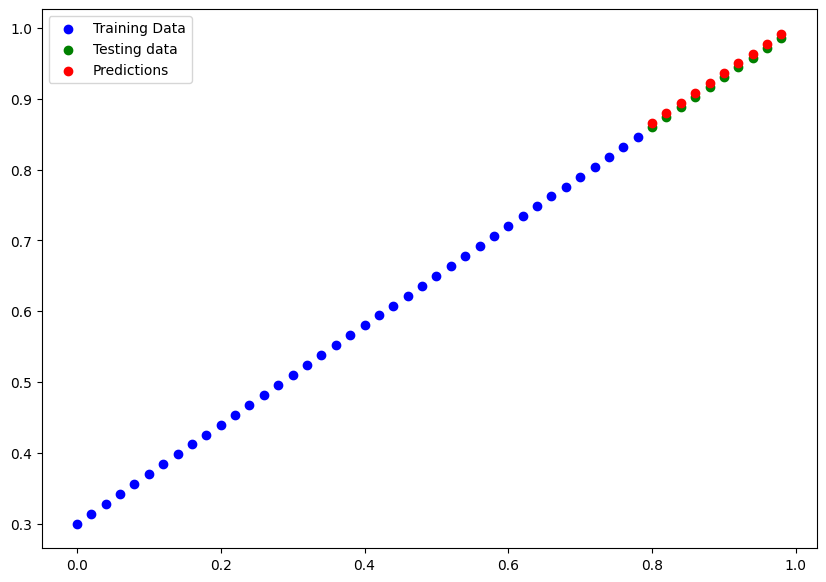

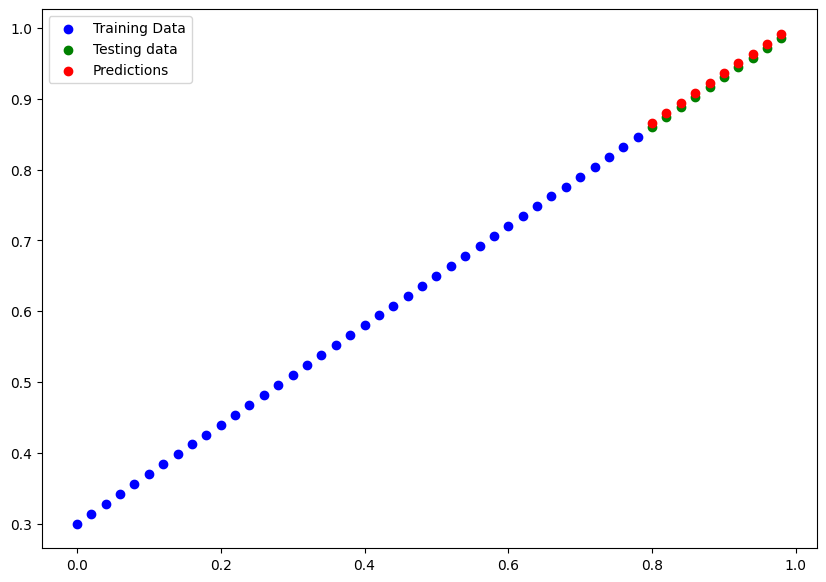

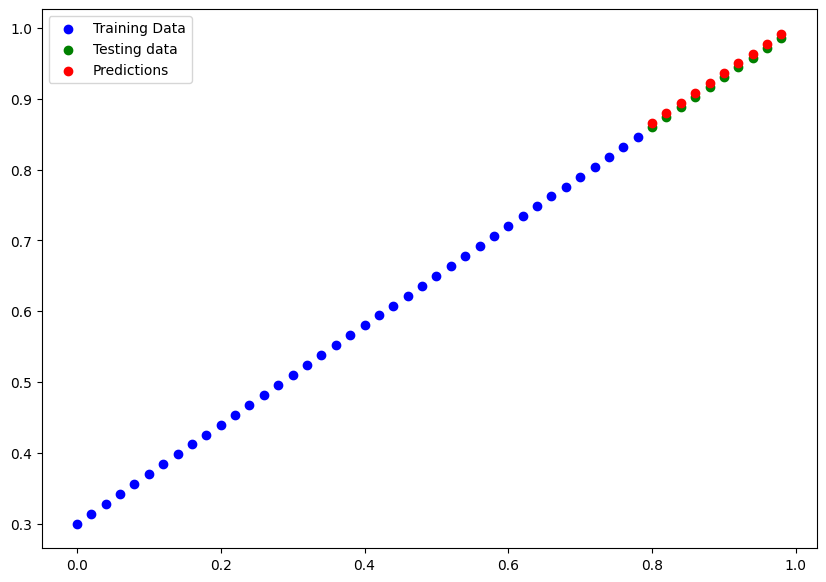

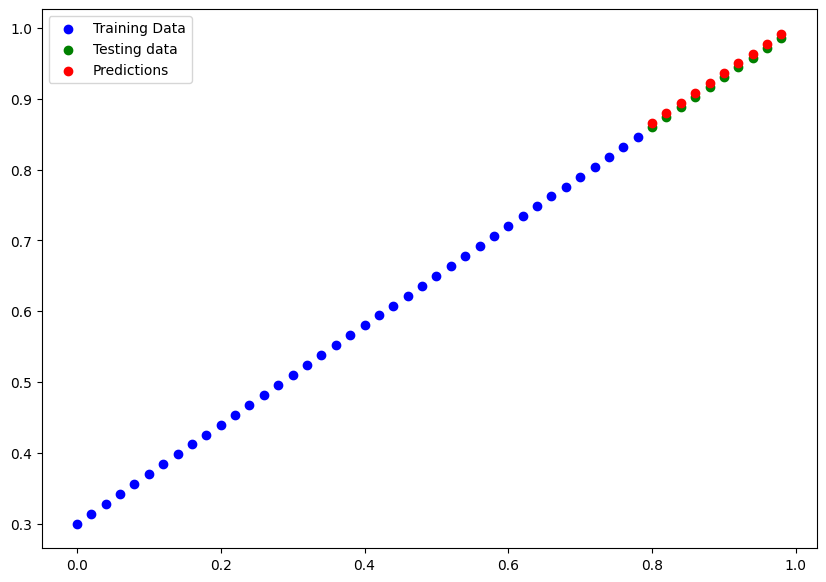

In [118]:
## training

epo = []
training_loss = []
testing_loss= []

epochs =1000
for epoch in range(epochs):
  ######## training
  # first step model.train()
  Regression_Model.train()

  # forward
  pred = Regression_Model.forward(X_train)

  # calculating the loss
  loss = loss_fn(pred,y_train)

  # optim zero nahi toh purane wale gradient ki wali accumulate hoti hai
  optimizer.zero_grad()

  # backward propogation
  loss.backward()

  # updating weights
  optimizer.step()

  ###### testing or evalution
  Regression_Model.eval() # put the model in evaluation
  with torch.inference_mode():
    pred_test = Regression_Model.forward(X_test)
    test_loss = loss_fn(pred_test,y_test)

  if epoch%20==0:
    visualize_data(predictions=pred_test)
    epo.append(epoch)
    training_loss.append(loss.detach().numpy()) # because we previously using tensor to calculate this loss
    testing_loss.append(test_loss) # with torch.inference_mode() taking care of that
    print(f"epoch : {epoch} , Training Loss : {loss}, Testing Loss : {test_loss}")






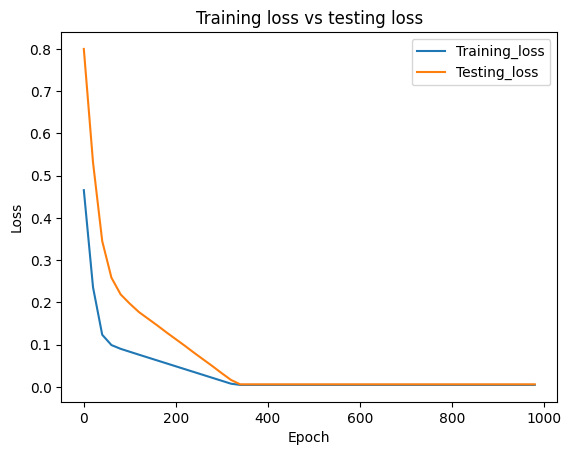

In [119]:
plt.plot(epo,training_loss,label = "Training_loss")
plt.plot(epo,testing_loss,label = "Testing_loss")
plt.title("Training loss vs testing loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend()

In [120]:
Regression_Model.state_dict()

OrderedDict([('weights', tensor([0.6936])), ('bias', tensor([0.2981]))])

## How save and load Models


## Steps to save weights
1. Creating directory for saving Models using Python's (pathlib) module  (ex :- ModelsWeights).

2. Create a file path to save model.

3. Call Torch.save(obj,f) where obj -> model.state_dict() and f is the filename of where to save the model.



In [121]:
from pathlib import Path

##1. creating directory
Model_path = Path("ModelsWeights")
Model_path.mkdir(parents=True,exist_ok = True)  # if not exit create 1  else no Need

# 2. file path
file_name = "Regression_Model.pth"
file_path  = Model_path / file_name

torch.save(obj = Regression_Model.state_dict(),f = file_path)


In [122]:
# checking the saved file
!ls -1 ModelsWeights/Regression_Model.pth

ModelsWeights/Regression_Model.pth


## Loading a  Model from weights

Steps
1. Initialize Model

2. Load weights   [load_state_dict(torch.load(f)]


In [123]:
# initiliaze Model
Load_Regression_Model = LinearRegressionModel()

# Load Weights
Load_Regression_Model.load_state_dict(torch.load(file_path))

<All keys matched successfully>

In [124]:
# Now do evaluation on loaded Model
# Putting in evaluation mode
Load_Regression_Model.eval()

with torch.inference_mode():
  load_model_pred = Load_Regression_Model(X_test)




In [125]:
Regression_Model.eval()
with torch.inference_mode():
  model_pred = Regression_Model(X_test)

In [126]:

load_model_pred == model_pred

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

# Putting all Together

## Data Preparation

In [127]:
weight = 0.7
bias = 0.3

start =0
end = 1
step = 0.02

X = torch.arange(start,end,step).unsqueeze(dim=1)

In [128]:
y = weight*X + bias
y.shape

torch.Size([50, 1])

In [129]:
split = (int)(0.8*len(X))
X_train , y_train  = X[0:split] ,y[0:split]
X_test , y_test = X[split:] ,y[split:]


## Build a Model

In [130]:
class RegM(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear_layer = nn.Linear(1,1) # (input_feature,output_feature()

  def forward(self,x):
    return self.linear_layer(x)

In [131]:
model = RegM()
list(model.parameters())

[Parameter containing:
 tensor([[-0.0568]], requires_grad=True),
 Parameter containing:
 tensor([-0.8798], requires_grad=True)]

In [132]:
model.state_dict()

OrderedDict([('linear_layer.weight', tensor([[-0.0568]])),
             ('linear_layer.bias', tensor([-0.8798]))])

## Training a Model And Testing

In [133]:
# Defining what will be ours loss function and what will be ours optimizer

loss_function = nn.L1Loss()

optimizer = torch.optim.SGD(params = model.parameters(),lr=0.01)

In [134]:
epoch_list = []
epochs = 500
training_loss =[]
test_loss = []

for epoch in range(epochs):
  # forward
  preds = model(X_train)

  # loss
  loss = loss_function(y_train,preds)



  # gradient zero
  optimizer.zero_grad() # resist from accumulation grad

  # backprop
  loss.backward()

  # optimizing step
  optimizer.step()

  # for test loss
  model.eval()
  with torch.inference_mode():
    pred_test = model(X_test)
    loss_test = loss_function(y_test,pred_test)



  if(epoch%20 ==0):
    training_loss.append(loss.detach().numpy())
    test_loss.append(loss_test)
    epoch_list.append(epoch)
    print(f" epoch : {epoch} | Training Loss : {loss} | Testing Loss : {loss_test}")







 epoch : 0 | Training Loss : 1.4749082326889038 | Testing Loss : 1.8398230075836182
 epoch : 20 | Training Loss : 1.2444883584976196 | Testing Loss : 1.5704030990600586
 epoch : 40 | Training Loss : 1.014068603515625 | Testing Loss : 1.3009833097457886
 epoch : 60 | Training Loss : 0.7836487889289856 | Testing Loss : 1.031563401222229
 epoch : 80 | Training Loss : 0.5532287359237671 | Testing Loss : 0.7621432542800903
 epoch : 100 | Training Loss : 0.32280880212783813 | Testing Loss : 0.4927234649658203
 epoch : 120 | Training Loss : 0.09590645134449005 | Testing Loss : 0.22686588764190674
 epoch : 140 | Training Loss : 0.04587695002555847 | Testing Loss : 0.11528150737285614
 epoch : 160 | Training Loss : 0.038496263325214386 | Testing Loss : 0.08917341381311417
 epoch : 180 | Training Loss : 0.03162777051329613 | Testing Loss : 0.07331519573926926
 epoch : 200 | Training Loss : 0.02475428208708763 | Testing Loss : 0.05745701864361763
 epoch : 220 | Training Loss : 0.01788902096450329

## Prediction And Visualization

In [135]:
def visualize(X_train = X_train,y_train = y_train,X_test = X_test,y_test=y_test, predictions=None):
  plt.scatter(X_train,y_train, c='b',label="Training Data")
  plt.scatter(X_test,y_test,c='g',label = "Testing Data")
  if(predictions!=None):
    plt.scatter(X_test,predictions,c='r',label = "Testing Data")
  plt.legend()


In [136]:
model.eval()
with torch.inference_mode():
  preds = model(X_test)

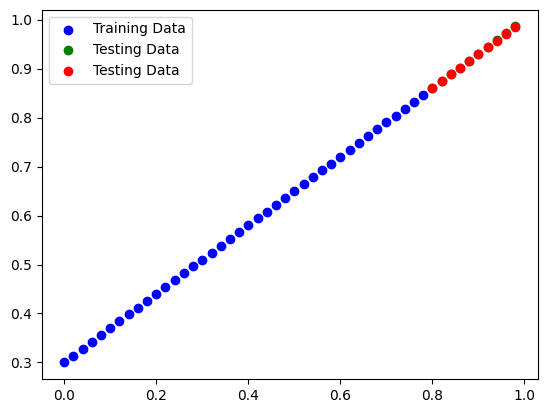

In [137]:
visualize(predictions = preds)

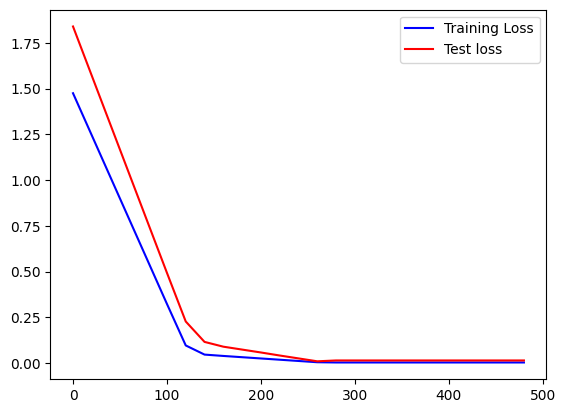

In [138]:
plt.plot(epoch_list,training_loss,c='b',label ="Training Loss")
plt.plot(epoch_list,test_loss,c='r',label = "Test loss")
plt.legend()

## Saving a Model And Loading Model



In [139]:
from pathlib import Path
#directory
Model_folder = Path("ModelsWeights")
Model_folder.mkdir(parents = True, exist_ok = True)

# file path
fileName = "model2.pth"
file_path = Model_folder / fileName

# save
torch.save(obj = model.state_dict(),f=file_path)




## Loading Model



In [140]:
model2 = RegM()

model2.load_state_dict(torch.load(file_path))

<All keys matched successfully>

In [141]:
model2.eval()
with torch.inference_mode():
  pred2 = model2(X_test)

In [142]:
pred2==preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])